# Correlations between Nuisances
This notebook plots the correlation matrix of the nuisances using the outputs from running runcards.py and runcombine.py. Firstly, make a `fitDiagnostics.root` file by activating cmsenv and running any of

- `combine -M FitDiagnostics combined.root  -t -1 --expectSignal 0 --rMin -10 --forceRecreateNLL  --saveWithUncertainties --saveOverallShapes --numToysForShapes 200 --plots` (background only)
- `combine -M FitDiagnostics combined.root -t -1 --expectSignal 1 --forceRecreateNLL  --saveWithUncertainties --saveOverallShapes --numToysForShapes 200 --plots` (s+b only)
- `combine -M FitDiagnostics DATACARD --forceRecreateNLL  --saveWithUncertainties --saveOverallShapes --numToysForShapes 200 --plots` (data)

You can use the script `getCovariances.sh` instead (from https://github.com/cericeci/combineScripts/blob/master/getCovariances.sh), and https://twiki.cern.ch/twiki/bin/viewauth/CMS/SUSPAGPreapprovalChecks for a nice walkthrough of the checks.

In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import hist.intervals
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

filename = "../FlatYears/cards-GluGluToSUEP_HT1000_T3p00_mS300.000_mPhi3.000_T3.000_modegeneric_TuneCP5_13TeV-pythia8/fitDiagnostics_t0.root"  # replace with your actual ROOT file path
file = uproot.open(filename)

In [3]:
# read in covariance matrix
cov = file['shapes_fit_s/overall_total_covar;1'].to_numpy()[0]
xlabels = file['shapes_fit_s/overall_total_covar;1'].axis(0).labels()
ylabels = file['shapes_fit_s/overall_total_covar;1'].axis(1).labels()

# calculate correlation matrix
corr = np.empty_like(cov)
for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])

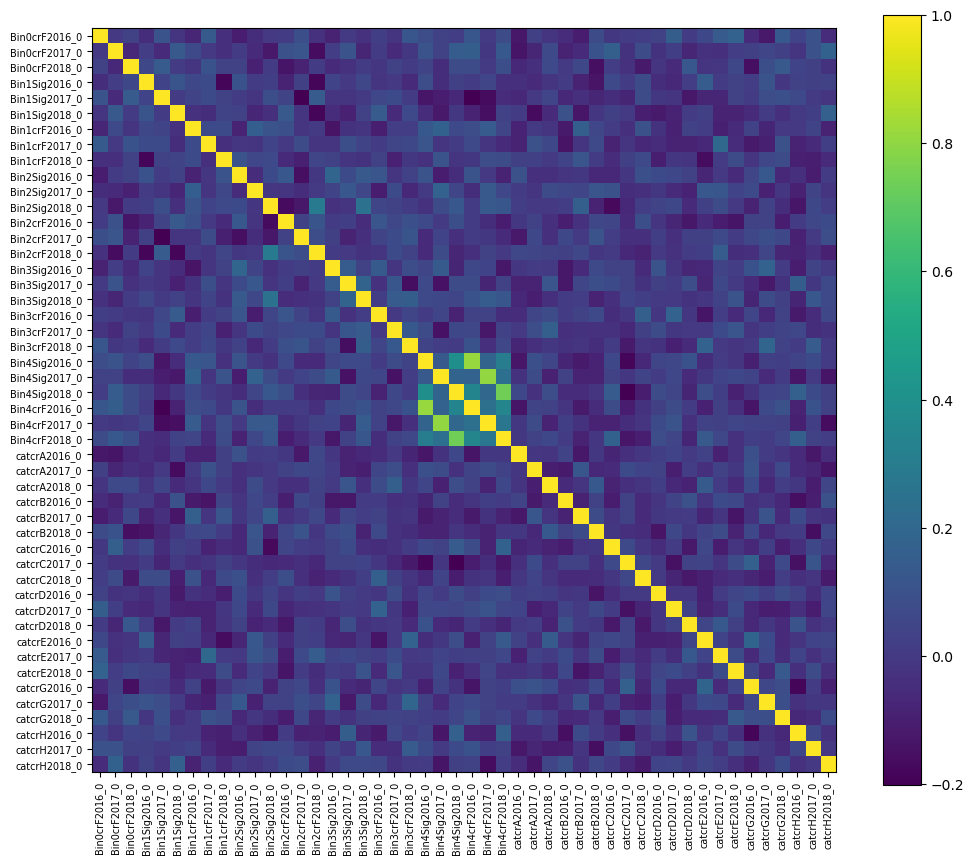

In [5]:
fig = plt.figure(figsize=(12,10))
ax = fig.subplots()
im = ax.imshow(corr)
fig.colorbar(im)
_ = ax.set_xticks(np.arange(0, len(xlabels)), xlabels, rotation = 90, fontsize=7)
_ = ax.set_yticks(np.arange(0, len(xlabels)), ylabels, fontsize=7)